## Final Project Submission

Please fill out:
* Student name: Yasir F. Karim, Amir M. Edris
* Student pace: full time
* Scheduled project review date/time: 08/21/20
* Instructor name: Fang Fang Lee.
* Blog post URL:


In [1]:
import pandas as pd  # Import the neccesarry libraries to work with and manipulate the data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # to avoid viewing scientific notation

##  Investigate the Box Office Mojo Movie Gross csv file
___

In [3]:
# Read the Box Office Mojo Gross income csv file in pandas dataframe 
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

In [4]:
bom_gross.head()  # look at the first five entries

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
bom_gross.dtypes  # check the column types

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Foreign Gross seems to be an object type. To manipulate and explore this data, we have to convert it to an **int** or **float** type.

In [6]:
bom_gross.shape  # check the dimensions of the DataFrame

(3387, 5)

In [7]:
bom_gross.year.unique()  # check how many years of information the dataframe has

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

There are **3387** titles in this dataframe.

In [8]:
bom_gross.isnull().sum()  # check how many values are null in each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
foreign_films = bom_gross[bom_gross.domestic_gross.isnull()]
foreign_films.head(10)  # check the null values in the domestic gross column in a seprate dataframe

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,nan,1300000,2010
298,Celine: Through the Eyes of the World,Sony,nan,119000,2010
302,White Lion,Scre.,nan,99600,2010
306,Badmaash Company,Yash,nan,64400,2010
327,Aashayein (Wishes),Relbig.,nan,3800,2010
537,Force,FoxS,nan,4800000,2011
713,Empire of Silver,NeoC,nan,19000,2011
871,Solomon Kane,RTWC,nan,19600000,2012
928,The Tall Man,Imag.,nan,5200000,2012
933,Keith Lemon: The Film,NaN,nan,4000000,2012


Through some inspection of the titles in this dataframe, we can tell that most of these films are foreign, which is why their domestic (North American) gross is not available. We can infer that in most of these cases the films were not released in the North American Market.

In [10]:
no_foreign = bom_gross[bom_gross.foreign_gross.isnull()]  # Let's check the entries with no foreign gross
no_foreign.head(15)

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
287,Sweetgrass,CGld,207000.0,NaN,2010
291,Casino Jack and the United States of Money,Magn.,177000.0,NaN,2010
308,Alamar,FM,61600.0,NaN,2010
311,Hatchet 2,Vita.,52600.0,NaN,2010
319,Living in Emergency,Truly,32200.0,NaN,2010


After inspecting these titles, we can see that a lot of these are obscure and most likely low budget indpedent films. These titles in most cases did not have a worldwide release. In other cases, it is likely that getting foreign gross data is stil not so convenient due lack a common information hub or a common currency. 

In [11]:
bom_gross['foreign_gross'] = bom_gross.foreign_gross.str.strip()

# Foreign gross is an object type so lets strip it of any whitespaces.

In [12]:
bom_gross['foreign_gross'].fillna(value = 0, inplace = True)
bom_gross['domestic_gross'].fillna(value = 0, inplace = True)

# because in most cases these columns have empty values due to lack of release we can exchange them 0

In [13]:
bom_gross.foreign_gross = bom_gross.foreign_gross.str.replace(',','')

# there are more string values that need to omitted in order to change column to float type

In [14]:
bom_gross.foreign_gross = bom_gross.foreign_gross.astype(float)  # convert column to float type

In [15]:
bom_gross.foreign_gross.dtype  # check to see if it succesfully converted 

dtype('float64')

Microsoft will most certainly want to release their films in both the domestic and foreign markets. Therefore, let's get rid of these 0 values.

In [16]:
bom_gross = bom_gross[(bom_gross.foreign_gross > 0) & bom_gross.domestic_gross > 0]
bom_gross.shape  # check how many movies are left

(2009, 5)

### Make a new Worldwide gross column
- Let's add the domestic and foreign gross to get this new column

In [17]:
bom_gross['worldwide_gross'] = bom_gross['domestic_gross'] + bom_gross['foreign_gross']
# make a new column of the worldwide income by adding the domestic and foreign gross

In [18]:
bom_gross.head()  # inspect the first few elements to confirm changes

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000.0
3,Inception,WB,292600000.0,535700000.0,2010,828300000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000.0


In [19]:
avg_yearly_gross = bom_gross.groupby('year')['worldwide_gross'].mean()
avg_yearly_gross # look at the avg worldwide gross by year

year
2010    79370582.8
2011    87910404.5
2012   113995264.2
2013   135695464.5
2014   115831843.1
2015   136311712.2
2016   155474388.0
2017   172009606.8
2018   163230345.5
Name: worldwide_gross, dtype: float64

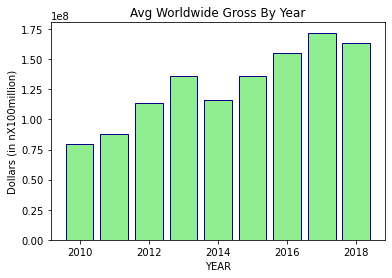

In [80]:
plt.bar(x = avg_yearly_gross.index, height= avg_yearly_gross, color = 'lightgreen', edgecolor ='darkblue')
plt.xlabel('YEAR')
plt.ylabel('Dollars (in nX100million)')
plt.title('avg worldwide gross by year'.title())
plt.show()

Average worldwide gross has kept increasing in the past decade. This should indicate that it's a good choice to be making movies now. Let's investigate futher.

## Explore The Numbers movie budgets dataset
---

In [21]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')  # read this csv file into a DataFrame
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
budgets.drop('id', axis = 1,inplace = True); # lets drop the id column

In [23]:
budgets.isnull().sum()  # check to see how many null values are in each column

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
budgets.shape  # check how many movies are in the dataframe through its dimension

(5782, 5)

In [25]:
budgets['year'] = budgets.release_date.str[-4:].astype(int)
# create a new column by extracting the year from release_date column as an INT type

In [26]:
budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to avoid viewing scientific notation

In [28]:
budgets.year.value_counts(normalize = True).head(20)  # check to see how many years of info does this dataset have

2015   0.058
2010   0.047
2008   0.046
2006   0.045
2014   0.044
2011   0.044
2009   0.041
2013   0.041
2012   0.041
2005   0.039
2007   0.038
2016   0.038
2002   0.036
2004   0.036
2003   0.035
2000   0.033
2001   0.031
1999   0.031
2017   0.029
1998   0.026
Name: year, dtype: float64

In [29]:
budgets.year.value_counts(normalize = True).head(20).sum() # what percantage of the data is covered in this bracket

0.7793151158768593

From this, We can conclude that there is a significant amount of the data from the **past two decades** in this dataframe.

In [30]:
# make a new dataframe with only the last 20 years of movie information
budgets_2000s = budgets[budgets['year'] >= 2000]
budgets_2000s.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [31]:
print(budgets_2000s.shape)  # check how many movies are registered from the decade

(4387, 6)


In [32]:
monetary_cols = ['production_budget','domestic_gross','worldwide_gross']  

In [33]:
for col in monetary_cols:  # transform the columns relating to capital in order to make them INT type
    budgets_2000s[col] = budgets_2000s[col].str.replace('$','').str.replace(',','').astype(int)
budgets_2000s.head()

<ipython-input-33-d50811b72d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_2000s[col] = budgets_2000s[col].str.replace('$','').str.replace(',','').astype(int)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [34]:
budgets_2000s.worldwide_gross.value_counts()  # there are many 0 values in both domestic and worldwide gross

0           342
8767338       1
3721988       1
70958         1
4020990       1
           ... 
4316497       1
26703184      1
1358          1
56653         1
28915761      1
Name: worldwide_gross, Length: 4046, dtype: int64

In [35]:
budgets_2000s[budgets_2000s.worldwide_gross == 0].head(15)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,"Dec 31, 2020",Moonfall,150000000,0,0,2020
479,"Dec 13, 2017",Bright,90000000,0,0,2017
480,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019
535,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020
670,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,2019
671,"Dec 31, 2019",355,75000000,0,0,2019
951,"Dec 11, 2015",The Ridiculous 6,60000000,0,0,2015
952,"Nov 8, 2019",Midway,59500000,0,0,2019
1205,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,0,2020
1206,"Nov 8, 2019",Arctic Dogs,50000000,0,0,2019


After inspecting the missing values, we can infer that there are mixed reasons for these 0 values. 
- Some of these films are streaming service releases, movies that make box office revenue. 
- Many are foreign films with no North American release. 
- Other values are simply missing even with North American Theatrical Release

In [36]:
# Disregard the movies with missing worldwide_gross and domestic_gross values

budgets_2000s = budgets_2000s[(budgets_2000s.worldwide_gross > 0) & (budgets_2000s.domestic_gross > 0)]
budgets_2000s.shape  # Check how many movies are left from the 2010s

(3865, 6)

In [37]:
3865/4387

0.8810120811488489

`11.9%` of the data was thrown out

In [38]:
# check for any outliers
budgets_2000s.worldwide_gross.sort_values(ascending=False).head(10)

0      2776345279
5      2053311220
6      2048134200
33     1648854864
66     1518722794
26     1517935897
3      1403013963
41     1348258224
260    1341693157
4      1316721747
Name: worldwide_gross, dtype: int64

From general knowlodge, there seems to be no irregular values on the higher income end of the table.
- Furthermore, we can confidently say a company with the size of microsoft will not produce movies for under at least `1,000,000`.
- Howerver, for the sake of being safe, we can disregard any movies that have been produced under `250,000`.

In [39]:
# take a look at the values for movies prduced under 250,000 just to get an idea of what we're removing
budgets_2000s[budgets_2000s.production_budget < 250000][['production_budget','worldwide_gross']]

,production_budget,worldwide_gross
5607,240000,7484
5608,230000,2703762
5609,225000,1109276
5610,225000,1032075
5617,200000,2430735
...,...,...
5774,7000,841926
5775,7000,71644
5776,7000,900
5779,5000,1338


In [40]:
budgets_2000s = budgets_2000s[budgets_2000s.production_budget > 250000]
budgets_2000s.shape  # take a look at the remaining number of movies

(3774, 6)

In [41]:
budgets = budgets_2000s  # reassign the DF to the original DF to avoid 'SettingWithCopyWarning'

In [42]:
budgets['gross_profit'] = budgets['worldwide_gross'] - budgets['production_budget']
# make a new column for the gross profit made from the movie

In [43]:
budgets['foreign_gross'] = budgets['worldwide_gross'] - budgets['domestic_gross']
# make a new column for only the foreign gross by doing (Worldwide - Domestic = Foreign)

## Decades: 2000s vs 2010s
___
We want to find out if there has been any change in the industry between the first and second decade of this century. We would like to answer the following questions:

- Has there been any sort of change in the market and how revenue is generated?
- Is older information from the first decade still viable for our research?

In [44]:
# Make a new column that assigns years to its respective decade
budgets['decade'] = budgets['year'].apply(lambda x: '2000s' if x < 2010 else '2010s')

In [45]:
budgets.decade.value_counts()  # check how many values are in each decade

2000s    2022
2010s    1752
Name: decade, dtype: int64

In [46]:
# group the dataframe by each decade to explore statistics
grpby_decade = budgets.groupby('decade').mean()[['foreign_gross','domestic_gross']]
grpby_decade  # get the average foreign and domestic gross for each decade

,foreign_gross,domestic_gross
decade,,
2000s,45761454.592,42866983.576
2010s,84218147.053,55217054.514


In [47]:
grpby_decade_sum = budgets.groupby('decade').sum()[['foreign_gross','domestic_gross']]
grpby_decade_sum

,foreign_gross,domestic_gross
decade,,
2000s,92529661185,86677040791
2010s,147550193636,96740279508


In the following code block we will attempt to create visualization for both the observations we just made. This will alow us to really look at the change that has happened. We will create two subplots that will:

1. Display the _**average**_ domestic gross and foreign for 2000s vs 2010s.
2. Display the _**total**_ domestic gross and foreign for 2000s vs 2010s.

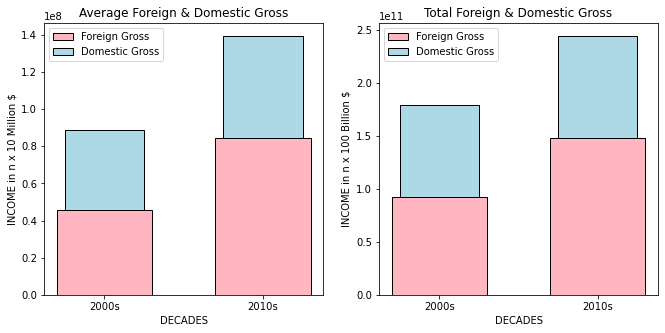

In [95]:
fig = plt.figure(figsize = (11,5))  # create a figure
ax1 = fig.add_subplot(1,2,1)  # add subplots with 1 row and 2 columns
ax2 = fig.add_subplot(1,2,2)

ax1.bar(x = grpby_decade.index, height = grpby_decade['foreign_gross'], label = 'Foreign Gross', width = .6,
        color = 'lightpink', edgecolor = 'black')
ax1.bar(x = grpby_decade.index, height = grpby_decade['domestic_gross'], label = 'Domestic Gross', 
        color = 'lightblue',edgecolor = 'black', bottom = grpby_decade['foreign_gross'], width = .5)
ax1.set_title('Average Foreign & Domestic Gross')
ax1.legend()
ax1.set_ylabel('INCOME in n x 10 Million $')
ax1.set_xlabel('DECADES')


ax2.bar(x = grpby_decade_sum.index, height = grpby_decade_sum['foreign_gross'], label = 'Foreign Gross',
        width = .6, color = 'lightpink', edgecolor = 'black')
ax2.bar(x = grpby_decade_sum.index, height = grpby_decade_sum['domestic_gross'], label = 'Domestic Gross', 
        color = 'lightblue', edgecolor = 'black',bottom = grpby_decade_sum['foreign_gross'], width = .5)
ax2.set_title('Total Foreign & Domestic Gross')
ax2.legend()
ax2.set_ylabel('INCOME in n x 100 Billion $')
ax2.set_xlabel('DECADES')
plt.show()

From the graphs we are able to tell that:

- There has been significant change in average and absolute foreign income in the past ten years. This may be due expansion in theatrical release and venturing into previously uncharted markets around the globe.
- However, average and absolute domestic has increased just slightly. The reasons could be inflation, bump in  ticket prices or just increased footfall. But we cannot be confident.

Microsoft has made a right decision to jump into film production. The market has significantly increased and by the trend should keep increasing until it plateaus. They should take adavantage and try to make their movies  appealing to the global audience. They might want to use their popular gaming franchises that are already well known.
#### Due to these observations and generally considering 10 years to be a long enough period in this industry. We will more or less disregard the information from before 2010 for this project.
___

In [49]:
budgets = budgets[budgets['year'] >= 2010]  # Limit the dataframe to only the past decade

## When should we release a movie?
Next, we will try to answer the aforementioned question by trying to see if there is an advantage in releasing movies in a certain period compared to others. We will calculate different statistics about the revenue to see if some months make more money than others.

In [50]:
budgets.release_date.str[:3].unique()  # the first 3 characters indicate the month of release
# check to see if there are only 12 unique values for month in the release_date column

array(['May', 'Jun', 'Dec', 'Apr', 'Nov', 'Jul', 'Mar', 'Feb', 'Oct',
       'Aug', 'Sep', 'Jan'], dtype=object)

In [51]:
budgets['month'] = budgets.release_date.str[:3]  # Create a new column for the months of release
budgets.head()

<ipython-input-51-6cfe59c52ba3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['month'] = budgets.release_date.str[:3]  # Create a new column for the months of release


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_profit,foreign_gross,decade,month
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,804600000,2010s,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,107000000,2010s,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,944008095,2010s,May
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,696540365,2010s,Dec
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,1116648995,2010s,Dec


___
**Let's look at the `mean profit` and `mean gross` by month to see if there is an advantage in any period**

In [52]:
profit = budgets.groupby('month')[['worldwide_gross','gross_profit']].mean().sort_values(by='gross_profit')
profit

,worldwide_gross,gross_profit
month,,
Sep,69153767.901,43173409.826
Jan,81762581.667,50952055.351
Oct,78295080.977,52220811.971
Aug,87862933.152,55472469.576
Apr,99672310.839,70721068.602
Feb,121945642.135,81816394.015
Mar,137630460.432,88977234.626
Dec,188946319.453,133241319.453
Nov,197410611.621,140860284.824


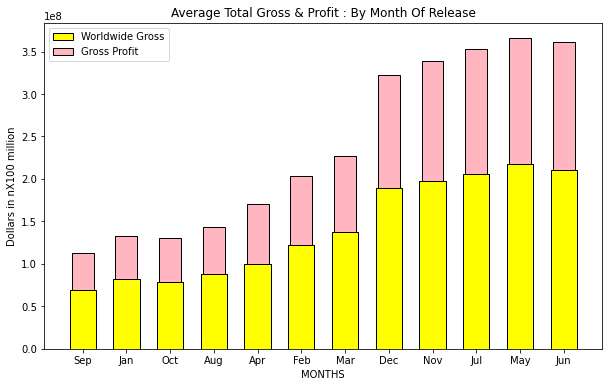

In [101]:
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(x = profit.index, height = profit['worldwide_gross'], label = 'Worldwide Gross', width = .6,
      color = 'yellow', edgecolor = 'black')
ax.bar(x = profit.index, height = profit['gross_profit'], color = 'lightpink', edgecolor = 'black',
       label = 'Gross Profit', bottom = profit['worldwide_gross'], width = .5)

ax.set_title('Average Total Gross & Profit : By Month Of Release')
ax.legend()

ax.set_ylabel('Dollars in nX100 million')
ax.set_xlabel('MONTHS')
plt.show()

#### From this chart we can observe that :
- There is a clear disparity between months of the year in terms revenue garnered.
- The vacation/festive months reign above others. `Summer months`; May, June, July, `Holiday Season`; November, december.

In conclusion, we can confidently say movies should be released during the more profitable periods for greater success.

In [54]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # to view three decimal places

## How much should we be investing in our projects?
This is a very important question to answer for the executives. At the end of the day it all comes down to money. We need to design the production of movie to maximize the revenue. So the questions begs:

- Is there a certain kind of movie according to its budget that holds an advantage over others?
- are people more likely to watch _low_ budget, _mid_ budget or _high_ budget blockbusters?

Let's make a new column depending on the budget:
- Low < `30,000,000`
- 30,000,000 < Mid < `125,000,000`
- High > `125,000,000`

The exact amount of the ranges do not matter. We picked these ranges based on observaions from the table and our general knowledge of movie budgets.

In [55]:
budgets['budget_level'] = budgets['production_budget'].apply(lambda x: 'low' if x < 30000000
                                                            else ('Mid' if x < 125000000
                                                                 else 'High'))
budgets['budget_level'].value_counts(normalize = True)

<ipython-input-55-45e5e90a65eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['budget_level'] = budgets['production_budget'].apply(lambda x: 'low' if x < 30000000


low    0.563
Mid    0.329
High   0.107
Name: budget_level, dtype: float64

As expected, most films falls under the low budget category and least movies fall under the high budget bin. This shouldn't be a surprise because if a significant number of movies were high budget flicks, they would lose the appeal among general audiences of being a unique experience.

In [56]:
# lets create a new table roi for Return On Investment
budgets['roi'] = (budgets['gross_profit'] / budgets['production_budget']) * 100

<ipython-input-56-0e1c2f8743ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets['roi'] = (budgets['gross_profit'] / budgets['production_budget']) * 100


In [57]:
groupby_budget_lvl = budgets.groupby('budget_level').mean()[['roi','gross_profit']]
groupby_budget_lvl  # lets look at the mean stats for each category of budget

,roi,gross_profit
budget_level,,
High,240.882,424144978.888
Mid,185.122,107798002.943
low,310.623,26077946.064


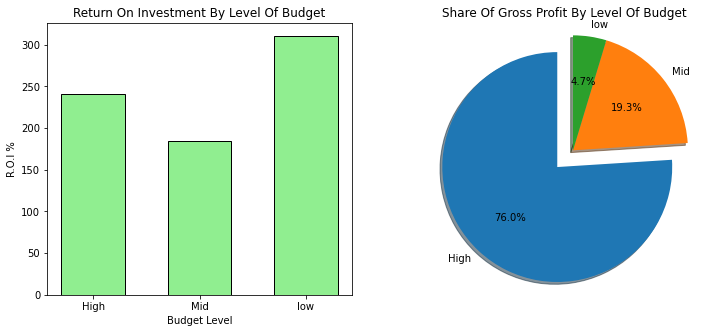

In [113]:
fig = plt.figure(figsize = (12,5))  # Lets plot the above mini-dataframe
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(x = groupby_budget_lvl.index, height = groupby_budget_lvl['roi'], color = 'lightgreen', 
        edgecolor = 'black',width = 0.6)
ax2.pie(groupby_budget_lvl['gross_profit'], labels = groupby_budget_lvl.index, shadow = True, startangle = 90,
       explode = (0.2, 0 ,0), autopct='%1.1f%%')
ax2.axis('equal')

ax1.set_title('return on investment by level of budget'.title())
ax2.set_title('share of gross profit by level of budget'.title())

ax1.set_ylabel('R.O.I %')
ax1.set_xlabel('Budget Level')

plt.show()

### From the above analysis we can conclude that:
- Gross profit is positively correlated with the level of production budget. Therefore, big budget movies will yield more revenue.
- However, there is greater Return on Investment in small budget films, thus, making them most profitable.
- Mid budget movies are least desirable and should be avoided as we venture into producing our first _Microsoft Film Studios_ ventures.
___